In [28]:
import requests
from lxml import html
import csv
import numpy as np

In [9]:
def print_element(element):
    print("<%s %s>%s ..." % (element.tag, element.attrib, element.text_content()[:200].replace("\n", " ")))

In [10]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Nobel_laureates')
tree = html.fromstring(page.text)
print_element(tree)

<html {'class': 'client-nojs', 'lang': 'en', 'dir': 'ltr'}>   List of Nobel laureates - Wikipedia document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" ); (window.RLQ=window.RLQ||[]).push(f ...


In [11]:
tables = tree.xpath('//table')
for table in tables:
    print_element(table)

<table {'class': 'wikitable sortable'}>  Year Physics Chemistry Physiology or Medicine Literature Peace Economics   1901 Röntgen, WilhelmWilhelm Röntgen Hoff, Jacobus Henricus van 'tJacobus Henricus van 't Hoff von Behring, Emil AdolfEmil  ...
<table {'role': 'presentation', 'class': 'mbox-small plainlinks sistersitebox', 'style': 'background-color:#f9f9f9;border:1px solid #aaa;color:#000'}>   Wikimedia Commons has media related to Nobel laureates.   ...
<table {'class': 'nowraplinks hlist collapsible collapsed navbox-inner', 'style': 'border-spacing:0;background:transparent;color:inherit'}>     v t e   Nobel Prizes    Prizes    Chemistry Economics1 Literature Peace Physics Physiology or Medicine      Laureates     by subject    Chemistry Economics Literature Peace Physics Physiology or  ...
<table {'class': 'nowraplinks navbox-subgroup', 'style': 'border-spacing:0'}>  by subject    Chemistry Economics Literature Peace Physics Physiology or Medicine      by criterion    African Arab As

In [12]:
table = tree.xpath('//table[@class="wikitable sortable"]')[0]
print_element(table)

<table {'class': 'wikitable sortable'}>  Year Physics Chemistry Physiology or Medicine Literature Peace Economics   1901 Röntgen, WilhelmWilhelm Röntgen Hoff, Jacobus Henricus van 'tJacobus Henricus van 't Hoff von Behring, Emil AdolfEmil  ...


In [13]:
subjects = [subject[0].text_content().replace("\n"," ") for subject in table.xpath('tr')[0][1:]]
subjects

['Physics',
 'Chemistry',
 'Physiology or Medicine',
 'Literature',
 'Peace',
 'Economics']

In [14]:
years = [item[0].text for item in table.xpath('tr')[1:-1]]

In [17]:
for index, item in enumerate(table.xpath('tr')[1][1:]):
    subject = subjects[index]
    print("%s" % subject)
    for winner in item.xpath('span[@class="vcard"]/span/a'):
        winner_name = winner.attrib["title"]
        winner_url = winner.attrib["href"]
        print("- %s" % winner_name)
    

Physics
- Wilhelm Röntgen
Chemistry
- Jacobus Henricus van 't Hoff
Physiology or Medicine
- Emil Adolf von Behring
Literature
- Sully Prudhomme
Peace
- Henry Dunant
- Frédéric Passy
Economics


In [21]:
year_list = []
subject_list = []
name_list = []
url_list = []
for y_index, year in enumerate(years):
    #print(year)
    for index, item in enumerate(table.xpath('tr')[y_index + 1][1:]):
        subject = subjects[index]
        #print("%s" % subject)
        for winner in item.xpath('span[@class="vcard"]/span/a'):
            winner_name = winner.attrib["title"]
            winner_url = winner.attrib["href"]
            #print("- %s" % winner_name)
            year_list.append(year)
            subject_list.append(subject)
            name_list.append(winner_name)
            url_list.append(winner_url)
        

In [35]:
import pandas as pd
import matplotlib.pylab as plt

/home/ajayshelar/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [29]:
data_set = pd.DataFrame(name_list, columns=["winner_name"])
data_set["subject"] = subject_list
data_set["year"] = year_list
data_set["year"] = data_set["year"].astype(np.int32)
data_set["url"] = url_list
data_set.head(5)

,winner_name,subject,year,url
0,Wilhelm Röntgen,Physics,1901,/wiki/Wilhelm_R%C3%B6ntgen
1,Jacobus Henricus van 't Hoff,Chemistry,1901,/wiki/Jacobus_Henricus_van_%27t_Hoff
2,Emil Adolf von Behring,Physiology or Medicine,1901,/wiki/Emil_Adolf_von_Behring
3,Sully Prudhomme,Literature,1901,/wiki/Sully_Prudhomme
4,Henry Dunant,Peace,1901,/wiki/Henry_Dunant


In [32]:
years_df = data_set["year"].value_counts().sort_index()
years_df

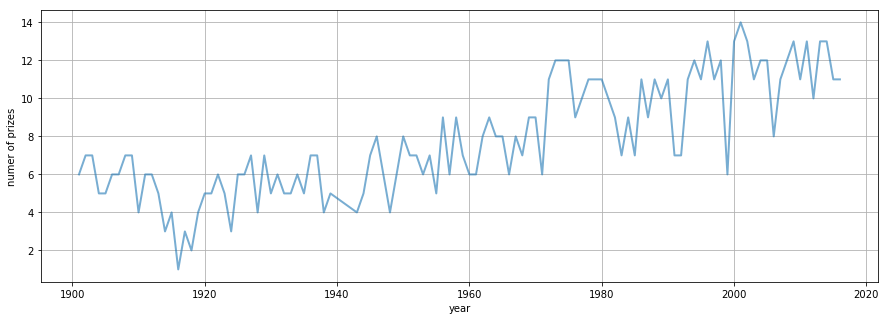

totalprizes 888


In [36]:
plt.figure(figsize=(15,5))
plt.plot(years_df.index, years_df.values, linewidth=2, alpha=.6)
plt.grid()
plt.xlabel("year")
plt.ylabel("numer of prizes")
plt.show()
print("totalprizes %s" % len(data_set))


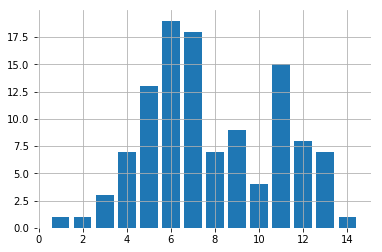

In [39]:
years_df.value_counts()
plt.bar(years_df.value_counts().index, years_df.value_counts())
plt.box(on ="off")
plt.grid()
plt.xlabel("number of prizes per year")
plt.xlabel("")
plt.show()

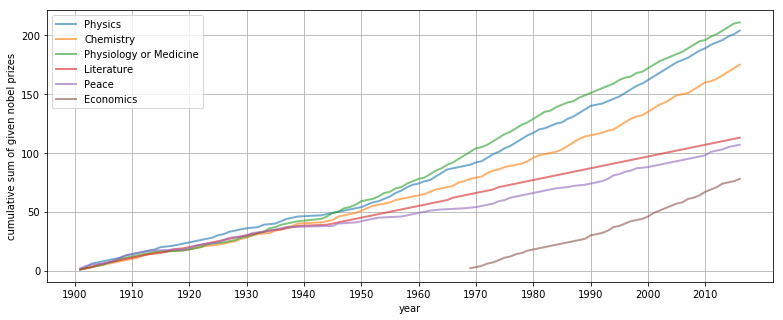

In [44]:
plt.figure(figsize=(13,5))
for subject in subjects:
    df = data_set[data_set["subject"]==subject]["year"].value_counts().sort_index().cumsum()
    plt.plot(df.index, df, label= subject, linewidth=2, alpha=.6)
plt.grid()
plt.legend(loc="best")
plt.xlabel("year")
plt.ylabel("cumulative sum of given nobel prizes")
plt.xticks(np.arange(1900,2020, 10))
plt.show()

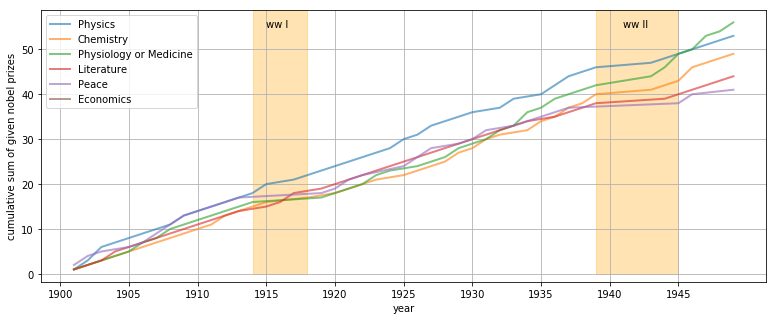

In [45]:
plt.figure(figsize=(13,5))
for subject in subjects:
    df = data_set[(data_set["subject"]==subject) & 
                  (data_set["year"].astype(np.int32)<1950)]["year"].value_counts().sort_index().cumsum()
    plt.plot(df.index, df, label= subject, linewidth=2, alpha=.6)
plt.grid()
plt.legend(loc="best")
plt.xlabel("year")
plt.ylabel("cumulative sum of given nobel prizes")
plt.xticks(np.arange(1900,1950, 5))

gca = plt.gca()

gca.add_patch(plt.Rectangle((1914,0), 4, 60, alpha=.3, color="orange"))
gca.add_patch(plt.Rectangle((1939,0), (45-39), 60, alpha=.3, color="orange"))

plt.annotate(s="ww I", xy=(1915,55))
plt.annotate(s="ww II", xy=(1941,55))

plt.show()